# Adjectives describing bodyparts

In [509]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
sns.set_theme(style="whitegrid", context="talk")
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [510]:
#load data
df = pd.read_csv("/Users/thearolskovsloth/data-science-x-am/output/body_descriptions.csv")
#df.head(20)
df.head()

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
0,0,hands,her,F,[],PG67640_text,F
1,1,lung,her,F,['left'],PG67640_text,F
2,2,face,her,F,[],PG67640_text,F
3,3,lungs,his,M,[],PG67640_text,F
4,4,head,his,M,[],PG67640_text,F


In [511]:
#take only rows that have a description of the body part
df = df[df['description'].str.len() > 2]
len(df)

69593

In [512]:
#lowercase all body parts
df["bodypart"] = df["bodypart"].str.lower()
len(df)

69593

In [513]:
#lemmatize all the bodyparts
nlp = spacy.load("en_core_web_sm")
#nlp.disable_pipes("ner", "parser")
#nlp.max_length = 2568609

lemmas = df.bodypart.str.cat(sep=' ')
lemmas

lemmatized_bodyparts = nlp(lemmas)
len(lemmatized_bodyparts)

69593

In [514]:
#apply to all bodypart obs
lemmatized_body = [w.lemma_ for w in lemmatized_bodyparts]
len(lemmatized_body)

69593

In [515]:
#overwrite the bodypart column with the lemmatied bodyparts
df['bodypart'] = lemmatized_body
df.head(5)

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
1,1,lung,her,F,['left'],PG67640_text,F
5,5,lungs,his,M,['sick'],PG67640_text,F
10,10,nose,his,M,['pink'],PG61671_text,M
13,13,nose,his,M,['pink'],PG61671_text,M
14,14,nose,his,M,"['soft', 'tender']",PG61671_text,M


In [516]:
#manual lemmatizing :)

df['bodypart'] = np.where(df['bodypart'] == "lips", "lip", df['bodypart'])
df.loc[df['bodypart'] == "lips"]

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender


In [517]:
df['description'] = df['description'].str.replace('[','')
df['description'] = df['description'].str.replace(']','')
df['description'] = df['description'].str.replace("'",'')
df


/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/4189316112.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['description'] = df['description'].str.replace('[','')
/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/4189316112.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['description'] = df['description'].str.replace(']','')


,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
1,1,lung,her,F,left,PG67640_text,F
5,5,lungs,his,M,sick,PG67640_text,F
10,10,nose,his,M,pink,PG61671_text,M
13,13,nose,his,M,pink,PG61671_text,M
14,14,nose,his,M,"soft, tender",PG61671_text,M
...,...,...,...,...,...,...,...
466412,466412,lung,his,M,splendid,PG52248_text,M
466421,466421,eye,Fermin,M,sharp,PG52248_text,M
466424,466424,tongue,his,M,native,PG52248_text,M
466440,466440,foot,his,M,front,PG52248_text,M


In [518]:
#unfold the descriptions that has more than one word
df= df.assign(description=df.description.str.split(",")).explode('description')


In [519]:
df.head(10)

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
1,1,lung,her,F,left,PG67640_text,F
5,5,lungs,his,M,sick,PG67640_text,F
10,10,nose,his,M,pink,PG61671_text,M
13,13,nose,his,M,pink,PG61671_text,M
14,14,nose,his,M,soft,PG61671_text,M
14,14,nose,his,M,tender,PG61671_text,M
19,19,eye,his,M,grey,PG66460_text,M
21,21,eye,his,M,grey,PG66460_text,M
29,29,shoulder,his,M,giant,PG66460_text,M
33,33,beard,his,M,great,PG66460_text,M


In [520]:
#make sure to remove everything else than the letters
import re
df['description'] = df['description'].map(lambda x: re.sub(r'\W+', '', x))
df

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
1,1,lung,her,F,left,PG67640_text,F
5,5,lungs,his,M,sick,PG67640_text,F
10,10,nose,his,M,pink,PG61671_text,M
13,13,nose,his,M,pink,PG61671_text,M
14,14,nose,his,M,soft,PG61671_text,M
...,...,...,...,...,...,...,...
466412,466412,lung,his,M,splendid,PG52248_text,M
466421,466421,eye,Fermin,M,sharp,PG52248_text,M
466424,466424,tongue,his,M,native,PG52248_text,M
466440,466440,foot,his,M,front,PG52248_text,M


In [521]:
#select only words of interest

interesting_bodyparts = ['face', 'body']


df = df[df['bodypart'].isin(interesting_bodyparts)]
df

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
44,44,face,boy,M,fresh,PG66460_text,M
77,77,body,his,M,wiry,PG65809_text,F
154,154,body,Chancellor,M,large,PG41477_text,M
273,273,face,her,F,white,PG3479_text,M
310,310,body,her,F,bared,PG3479_text,M
...,...,...,...,...,...,...,...
466189,466189,face,her,F,white,PG50953_text,F
466200,466200,face,his,M,burned,PG45262_text,M
466277,466277,face,his,M,beaten,PG45262_text,M
466309,466309,face,his,M,bloated,PG45262_text,M


# split efter owner gender

In [522]:
#MALE AUTHORS - 2 dataframes, 1 for each owner gender

#male owners
male_owners_male_authors = df.loc[(df['owner_gender']=="M") & (df['author_gender']=="M")]

#female owners
female_owners_male_authors = df.loc[(df['owner_gender']=="F") & (df['author_gender']=="M")]

female_owners_male_authors.head()

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
273,273,face,her,F,white,PG3479_text,M
310,310,body,her,F,bared,PG3479_text,M
311,311,body,her,F,radiant,PG3479_text,M
322,322,face,her,F,sweet,PG3479_text,M
359,359,face,her,F,ecstatic,PG3479_text,M


In [523]:
#FEMALE AUTHORS - 2 dataframes, 1 for each owner gender

##HER SPLITTES DET EFTER OWNER GENDER

#male owners
male_owners_female_authors = df.loc[(df['owner_gender']=="M") & (df['author_gender']=="F")]

#female owners
female_owners_female_authors = df.loc[(df['owner_gender']=="F") & (df['author_gender']=="F")]


In [524]:
#count the combination of bodyparts and their corresponding descriptions

#female authors
female_owners_female_authors = female_owners_female_authors.groupby(['bodypart','description']).size().reset_index().rename(columns={0:'count_adj_ff'})
male_owners_female_authors = male_owners_female_authors.groupby(['bodypart','description']).size().reset_index().rename(columns={0:'count_adj_mf'})

#male authors
female_owners_male_authors = female_owners_male_authors.groupby(['bodypart','description']).size().reset_index().rename(columns={0:'count_adj_fm'})
male_owners_male_authors = male_owners_male_authors.groupby(['bodypart','description']).size().reset_index().rename(columns={0:'count_adj_mm'})

In [525]:
female_owners_female_authors

,bodypart,description,count_adj_ff
0,body,Dutch,1
1,body,aching,1
2,body,ardent,1
3,body,bare,2
4,body,beautiful,5
...,...,...,...
483,face,wrecked,1
484,face,wrinkled,15
485,face,yellow,1
486,face,young,16


In [526]:
bodypart = "face"

In [527]:
adj_list = ['white', 'pale', 'own', 'handsome', 'dark', 'thin', 'little', 'old', 'red', 'young', 'round', 'whole', 'flushed', 'brown', 'lean','beautiful', 'wrinkled', 'long', 'haggard','upturned','pretty', 'lovely', 'smiling', 'fair', 'sweet', 'fat', 'broad', 'small', 'eager', 'strong']

#adj_list = ['whole', 'own', 'little', 'young', 'dead', 'slim', 'slender', 'big', 'lithe', 'naked', 'small', 'long', 'huge', 'great',  'strong',  'entire',  'beautiful', 'poor', 'thin', 'white', 'soft', 'warm', 'weary', 'tired', 'limp', 'supple', 'lean', 'heavy', 'tall', 'fat']


In [528]:

ff = female_owners_female_authors.loc[female_owners_female_authors['bodypart']==bodypart]
ff['std_female_owners_female_authors'] = ff.apply(lambda row: int(row.count_adj_ff)/ff['count_adj_ff'].sum(), axis=1)
ff = ff.sort_values(by = "std_female_owners_female_authors", axis=0, ascending=False)
ff = ff[ff['description'].isin(adj_list)]

mf = male_owners_female_authors.loc[male_owners_female_authors['bodypart']==bodypart]
mf['std_male_owners_female_authors'] = mf.apply(lambda row: int(row.count_adj_mf)/mf['count_adj_mf'].sum(), axis=1)
mf = mf.sort_values(by = "std_male_owners_female_authors", axis=0, ascending=False)
mf = mf[mf['description'].isin(adj_list)]

female_authors = pd.merge(ff, mf, on=['description'])
female_authors.head()

/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/2095855933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff['std_female_owners_female_authors'] = ff.apply(lambda row: int(row.count_adj_ff)/ff['count_adj_ff'].sum(), axis=1)
/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/2095855933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf['std_male_owners_female_authors'] = mf.apply(lambda row: int(row.count_adj_mf)/mf['count_adj_mf'].sum(), axis=1)


,bodypart_x,description,count_adj_ff,std_female_owners_female_authors,bodypart_y,count_adj_mf,std_male_owners_female_authors
0,face,white,111,0.071291,face,60,0.032680
1,face,little,67,0.043031,face,42,0.022876
2,face,pale,59,0.037893,face,39,0.021242
3,face,thin,35,0.022479,face,47,0.025599
4,face,flushed,35,0.022479,face,23,0.012527


In [529]:
mm = male_owners_male_authors.loc[male_owners_male_authors['bodypart']==bodypart]
mm['std_male_owners_male_authors'] = mm.apply(lambda row: int(row.count_adj_mm)/mm['count_adj_mm'].sum(), axis=1)
mm = mm.sort_values(by = "std_male_owners_male_authors", axis=0, ascending=False)
mm = mm[mm['description'].isin(adj_list)]

fm = female_owners_male_authors.loc[female_owners_male_authors['bodypart']==bodypart]
fm['std_female_owners_male_authors'] = fm.apply(lambda row: int(row.count_adj_fm)/fm['count_adj_fm'].sum(), axis=1)
fm = fm.sort_values(by = "std_female_owners_male_authors", axis=0, ascending=False)
fm = fm[fm['description'].isin(adj_list)]

male_authors = pd.merge(mm, fm, on=['description'])
male_authors.head()

/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/2858615161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm['std_male_owners_male_authors'] = mm.apply(lambda row: int(row.count_adj_mm)/mm['count_adj_mm'].sum(), axis=1)
/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/2858615161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fm['std_female_owners_male_authors'] = fm.apply(lambda row: int(row.count_adj_fm)/fm['count_adj_fm'].sum(), axis=1)


,bodypart_x,description,count_adj_mm,std_male_owners_male_authors,bodypart_y,count_adj_fm,std_female_owners_male_authors
0,face,white,149,0.032398,face,148,0.082913
1,face,pale,140,0.030441,face,110,0.061625
2,face,own,114,0.024788,face,35,0.019608
3,face,handsome,111,0.024136,face,8,0.004482
4,face,dark,103,0.022396,face,13,0.007283


In [530]:
#sort alphabetically

male_authors= male_authors.sort_values(by = "description", axis=0, ascending=True)
male_authors

#FEMALE AUTHORS
female_authors= female_authors.sort_values(by = "description", axis=0, ascending=True)
female_authors

,bodypart_x,description,count_adj_ff,std_female_owners_female_authors,bodypart_y,count_adj_mf,std_male_owners_female_authors
11,face,beautiful,22,0.014130,face,18,0.009804
28,face,broad,4,0.002569,face,21,0.011438
19,face,brown,14,0.008992,face,38,0.020697
18,face,dark,15,0.009634,face,58,0.031590
13,face,eager,19,0.012203,face,15,0.008170
12,face,fair,21,0.013487,face,18,0.009804
27,face,fat,5,0.003211,face,7,0.003813
4,face,flushed,35,0.022479,face,23,0.012527
25,face,haggard,7,0.004496,face,17,0.009259
22,face,handsome,10,0.006423,face,66,0.035948


In [531]:
female_authors['skewness_female_authors'] = np.where(female_authors['std_male_owners_female_authors'] > female_authors['std_female_owners_female_authors'], ((female_authors['std_male_owners_female_authors'])/(female_authors['std_female_owners_female_authors'])), ((-female_authors['std_female_owners_female_authors'])/female_authors['std_male_owners_female_authors']))
female_authors['n'] = range(len(female_authors))

female_authors['skew_direction'] = np.where(female_authors['skewness_female_authors'] > 0, "male_skew", "female_skew")

female_authors

,bodypart_x,description,count_adj_ff,std_female_owners_female_authors,bodypart_y,count_adj_mf,std_male_owners_female_authors,skewness_female_authors,n,skew_direction
11,face,beautiful,22,0.014130,face,18,0.009804,-1.441233,0,female_skew
28,face,broad,4,0.002569,face,21,0.011438,4.452206,1,male_skew
19,face,brown,14,0.008992,face,38,0.020697,2.301821,2,male_skew
18,face,dark,15,0.009634,face,58,0.031590,3.279085,3,male_skew
13,face,eager,19,0.012203,face,15,0.008170,-1.493642,4,female_skew
12,face,fair,21,0.013487,face,18,0.009804,-1.375723,5,female_skew
27,face,fat,5,0.003211,face,7,0.003813,1.187255,6,male_skew
4,face,flushed,35,0.022479,face,23,0.012527,-1.794421,7,female_skew
25,face,haggard,7,0.004496,face,17,0.009259,2.059524,8,male_skew
22,face,handsome,10,0.006423,face,66,0.035948,5.597059,9,male_skew


In [532]:
male_authors['skewness_male_authors'] = np.where(male_authors['std_male_owners_male_authors'] > male_authors['std_female_owners_male_authors'], ((male_authors['std_male_owners_male_authors'])/(male_authors['std_female_owners_male_authors'])), ((-male_authors['std_female_owners_male_authors'])/male_authors['std_male_owners_male_authors']))

male_authors['n'] = range(len(male_authors))
male_authors['skew_direction'] = np.where(male_authors['skewness_male_authors'] > 0, "male_skew", "female_skew")

male_authors

,bodypart_x,description,count_adj_mm,std_male_owners_male_authors,bodypart_y,count_adj_fm,std_female_owners_male_authors,skewness_male_authors,n,skew_direction
27,face,beautiful,8,0.001740,face,56,0.031373,-18.035294,0,female_skew
19,face,broad,35,0.007610,face,5,0.002801,2.716895,1,male_skew
12,face,brown,48,0.010437,face,11,0.006162,1.693649,2,male_skew
4,face,dark,103,0.022396,face,13,0.007283,3.075167,3,male_skew
23,face,eager,19,0.004131,face,11,0.006162,-1.491641,4,female_skew
25,face,fair,15,0.003262,face,17,0.009524,-2.920000,5,female_skew
16,face,fat,44,0.009567,face,10,0.005602,1.707763,6,male_skew
21,face,flushed,31,0.006741,face,23,0.012885,-1.911575,7,female_skew
11,face,haggard,51,0.011089,face,6,0.003361,3.299087,8,male_skew
3,face,handsome,111,0.024136,face,8,0.004482,5.385274,9,male_skew


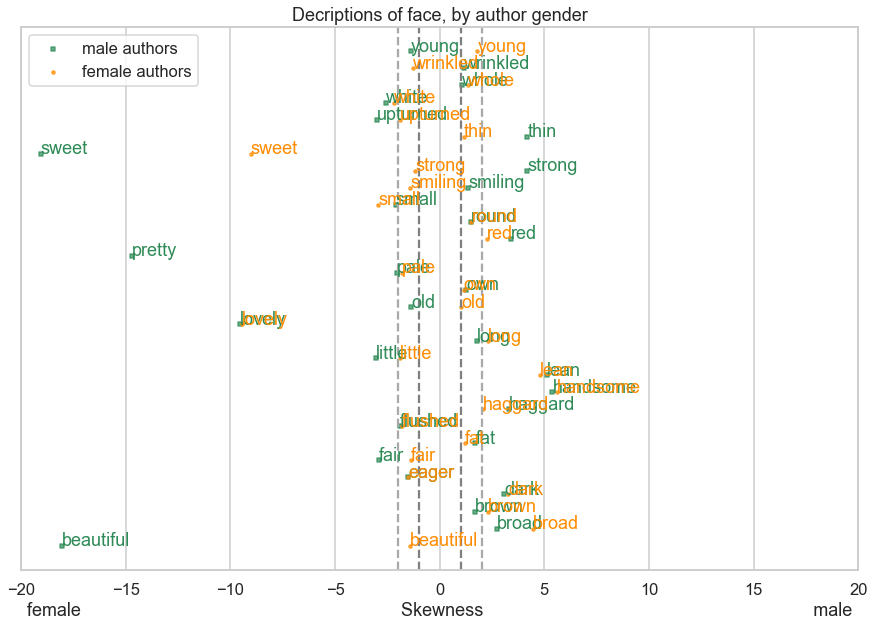

In [533]:
x = list(male_authors['skewness_male_authors'])+list(female_authors['skewness_female_authors'])
y = list(range(0,30))+list(range(0,30))
fig = plt.figure()
ax1 = fig.add_subplot(111)
#fig, ax = plt.subplots()

ax1.scatter(x[:30], y[:30], s=10, c='seagreen', marker="s", label='male authors', alpha = 0.7)
ax1.scatter(x[30:],y[30:], s=10, c='darkorange', marker="o", label='female authors', alpha = 0.7)

'''
texts = []

for i, txt in enumerate(male_authors.description):
    texts.append(ax1.annotate(txt, (male_authors.skewness_male_authors.iat[i],male_authors.n.iat[i]), color = "seagreen"))
for i, txt in enumerate(female_authors.description):
    texts.append(ax1.annotate(txt, (female_authors.skewness_female_authors.iat[i],female_authors.n.iat[i]), color = "darkorange"))
    
adjust_text(texts)
'''
for i, txt in enumerate(male_authors.description):
    ax1.annotate(txt, (male_authors.skewness_male_authors.iat[i],male_authors.n.iat[i]), color = "seagreen")
for i, txt in enumerate(female_authors.description):
    ax1.annotate(txt, (female_authors.skewness_female_authors.iat[i],female_authors.n.iat[i]), color = "darkorange")
    

#plt.axvline(0, ls = "--", color="black")
plt.axvline(1, ls = "--", color="grey")
plt.axvline(-1, ls = "--", color="grey")
plt.axvline(2, ls = "--", color="darkgrey")
plt.axvline(-2, ls = "--", color="darkgrey")
plt.legend(loc='upper left');
plt.title(f'Decriptions of {bodypart}, by author gender')
plt.xlabel('female                                                                Skewness                                                                  male')
ax1.yaxis.set_visible(False)
plt.xlim(-20,20)
fig.set_figheight(10)
fig.set_figwidth(15)

In [534]:
f = female_authors[['bodypart_x', 'description', 'skewness_female_authors']]
f['author_gender'] = 'Female author'
f=f.rename(columns = {'skewness_female_authors':'skewness'})
f

m = male_authors[['bodypart_x', 'description', 'skewness_male_authors']]
m['author_gender'] = 'Male author'
m=m.rename(columns = {'skewness_male_authors':'skewness'})
m


df16 = pd.concat([m, f])


df16= df16.sort_values(by = "description", axis=0, ascending=True)
df16

#df16

/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/3283258541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['author_gender'] = 'Female author'
/var/folders/lr/m88n3jxd3ls79c_st34bhpr00000gn/T/ipykernel_79702/3283258541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['author_gender'] = 'Male author'


,bodypart_x,description,skewness,author_gender
27,face,beautiful,-18.035294,Male author
11,face,beautiful,-1.441233,Female author
19,face,broad,2.716895,Male author
28,face,broad,4.452206,Female author
12,face,brown,1.693649,Male author
19,face,brown,2.301821,Female author
4,face,dark,3.075167,Male author
18,face,dark,3.279085,Female author
23,face,eager,-1.491641,Male author
13,face,eager,-1.493642,Female author


In [535]:

df16['colors'] = ['coral' if x == 'Female author' else 'seagreen' for x in df16['author_gender']]


df16['skewness'] = np.where(df16['skewness'] > 0, df16['skewness']-1,df16['skewness']+1)

df16


,bodypart_x,description,skewness,author_gender,colors
27,face,beautiful,-17.035294,Male author,seagreen
11,face,beautiful,-0.441233,Female author,coral
19,face,broad,1.716895,Male author,seagreen
28,face,broad,3.452206,Female author,coral
12,face,brown,0.693649,Male author,seagreen
19,face,brown,1.301821,Female author,coral
4,face,dark,2.075167,Male author,seagreen
18,face,dark,2.279085,Female author,coral
23,face,eager,-0.491641,Male author,seagreen
13,face,eager,-0.493642,Female author,coral


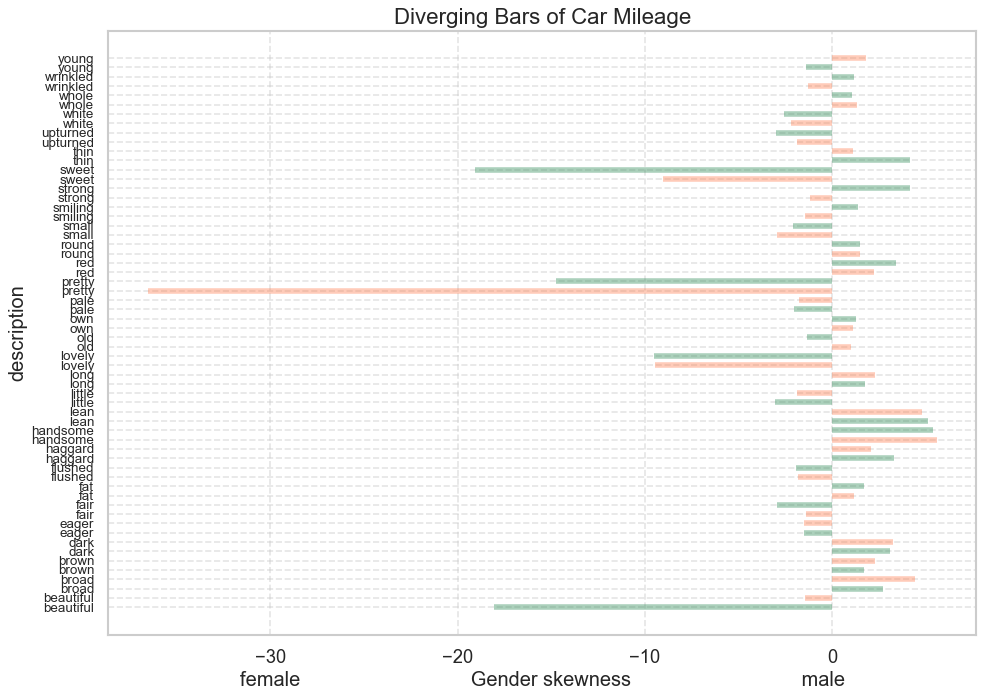

In [286]:

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df16.index, xmin=0, xmax=df16.skewness, color=df16.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='description', xlabel='female                               Gender skewness                               male')
plt.yticks(df16.index, df16.description, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

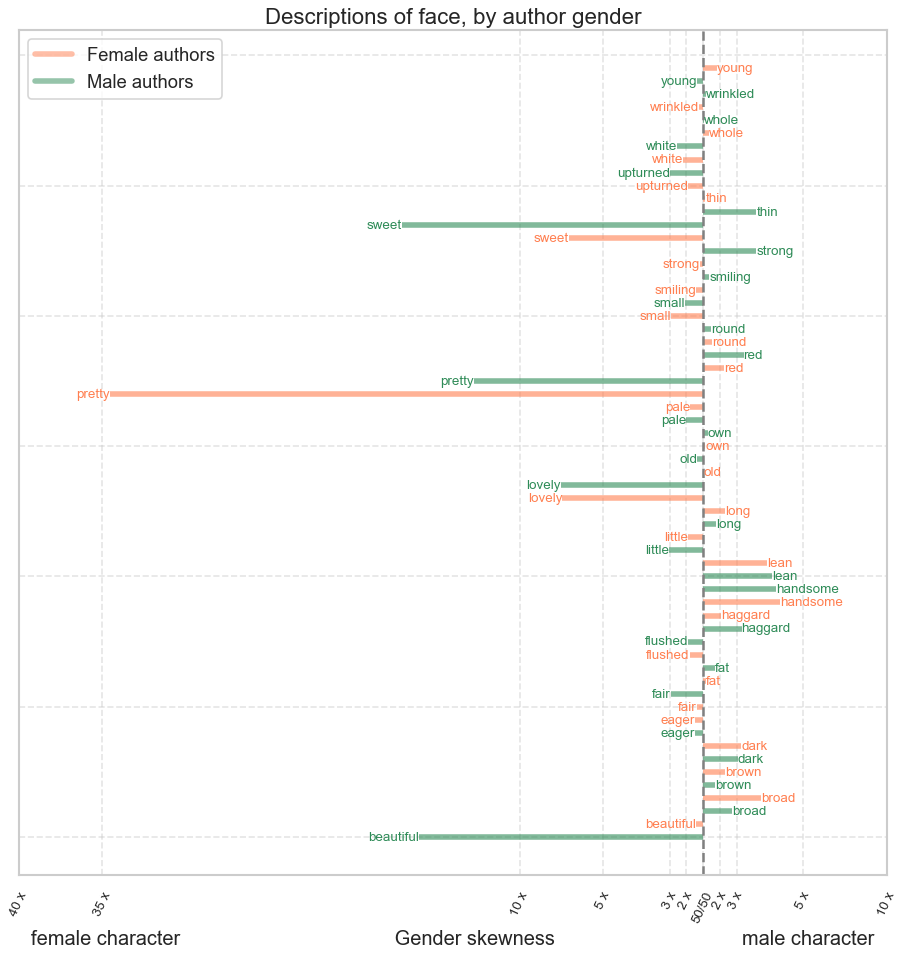

In [549]:
#df16.reset_index(inplace=True)

plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df16.index, xmin=0, xmax=df16.skewness, color=df16.colors, alpha=0.6, linewidth=5, label = "author_gender")
for x, y, tex,ag in zip(df16.skewness, df16.index, df16.description, df16.author_gender):
    t = plt.text(x, y, tex, horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'coral' if ag =="Female author" else 'seagreen', 'size':12})

# Decorations    
plt.gca().set(xlabel='female character                                       Gender skewness                                  male character')
plt.xlim(-41,11)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.xaxis.set_ticks([-41, -36, -11, -6, -2, -1, 0, 1, 2, 6, 11])
frame1.axes.xaxis.set_ticklabels(ticklabels =['40 x','35 x','10 x', '5 x', '3 x', '2 x', '50/50', '2 x', '3 x', '5 x', '10 x'], rotation=65, size=12)


#plt.yticks(df16.index, df16.description, fontsize=12)
plt.title(f'Descriptions of {bodypart}, by author gender', fontdict={'size':20})
plt.grid(1, linestyle='--', alpha=0.5)
plt.axvline(0, ls = "--", color="grey")

#plt.xticks(rotation=45)

#costumize legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='coral',alpha=0.5, lw=5),
                Line2D([0], [0], color='seagreen', alpha=0.5, lw=5)]
plt.legend(custom_lines, ['Female authors', 'Male authors'])


#plt.show()
plt.savefig(f'{bodypart}_des.png')

